In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os
import statistics

In [89]:
PATH = "../../data/finals_all_0106"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [90]:
file_data = []
diff_means = []
diff_program_means_dict = {'none': [], 'windup': [], 'getpixel': [], 'bitblt': [], 'getdbits': []}
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    try:
        mean = data_in.query("fw != -1")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
            diff_program_means_dict[data_in['program'][1]].append(mean)
    except:
        #print(data_in, file)
        pass
    file_data.append(data_in)
    
data_original = pd.concat(file_data)

In [164]:
print(np.mean(diff_program_means_dict['getpixel']))
print(np.mean(diff_program_means_dict['windup']))

5218.161586826346
2258.910161896745


In [91]:
data_original['ete_upper'] = data_original['ete_upper'] / 1000
data_original['ete_lower'] = data_original['ete_lower'] / 1000
data_original['fw'] = data_original['fw'] / 1000
data_original['diff'] = data_original['diff'] / 1000

data = data_original
data = data[data['fullscreen'] == 'fullscreen']
data = data[data['program'] != 'bitblt']
data = data[data['program'] != 'getdbits']
data = data[data['program'] != 'none']
data

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11.810,14.128,5.701,6.109
1,1,1,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,12.160,14.305,6.129,6.031
2,2,2,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10.772,13.260,4.799,5.973
3,3,3,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11.461,13.775,5.455,6.006
4,4,4,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10.772,12.916,7.094,3.678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,43.989,0.338,40.566,3.423
196,196,196,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,41.916,0.509,38.535,3.381
197,197,197,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,43.320,0.346,39.826,3.494
198,198,198,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,44.345,0.689,40.669,3.676


In [92]:
COLOR_GLUTROT = '#DA3C43'
COLOR_HEIDENELKE = '#9C004B'

COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

COLOR_GREEN = '#7dff1a'
COLOR_DARKGREEN = '#4FB800'

COLOR_OCKER_ANDI = '#ebb300'
COLOR_OCKER = '#EC7F00'

COLOR_NONE = '#8E8E8D'

PALETTE_LIGHT = [COLOR_BLUE, COLOR_GREEN, COLOR_GLUTROT, COLOR_OCKER_ANDI]
PALETTE_DARK = [COLOR_DARKBLUE, COLOR_DARKGREEN, COLOR_HEIDENELKE, COLOR_OCKER]

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [148]:
data_none = data_original[data_original['program'] == 'none']
data_getpixel = data[data['program'] == 'getpixel']
data_windup = data[data['program'] == 'windup']

median_ete_none = data_none['ete_upper'].median()
sd_ete_none = data_none['ete_upper'].std()
median_ete_getpixel = data_getpixel['ete_upper'].median()
sd_ete_getpixel = data_getpixel['ete_upper'].std()
median_ete_windup = data_windup['ete_upper'].median()
sd_ete_windup = data_windup['ete_upper'].std()

print(f'none --- median: {median_ete_none}, std: {sd_ete_none}')
print(f'getpixel --- median: {median_ete_getpixel}, std: {sd_ete_getpixel}')
print(f'windup --- median: {median_ete_windup}, std: {sd_ete_windup}')


none --- median: 11.284, std: 33.98869922647927
getpixel --- median: 9.216, std: 43.798883809800536
windup --- median: 9.389, std: 39.91113138492897


In [165]:
print(f'negative diffs: {len(data_getpixel[data_getpixel['diff'] < 0])}')
print(f'negative diffs for frameworks: {data_getpixel[data_getpixel['diff'] < 0]['framework'].unique()}')

print(f'diffs outlying (>10ms): {len(data_getpixel[data_getpixel['diff'] > 10])}')
print(f'diffs outlying (>10ms) for frameworks: {data_getpixel[data_getpixel['diff'] > 10]['framework'].unique()}')

print(f'program could not measure {len(data_getpixel[data_getpixel['fw'] < 0])} times')
print(f'program could not measure for frameworks: {data_getpixel[data_getpixel['fw'] < 0]['framework'].unique()}')


negative diffs: 20
negative diffs for frameworks: ['Java2D' 'JavaSwing' 'pyqt6_quick' 'SDL2_Direct3D']
diffs outlying (>10ms): 1275
diffs outlying (>10ms) for frameworks: ['GDIplus' 'GTK' 'pyglet' 'tkinter']
program could not measure 1801 times
program could not measure for frameworks: ['Direct3D' 'FLTK' 'GLEW' 'pyglet' 'SFML' 'Skia']


In [166]:
print(f'negative diffs: {len(data_windup[data_windup['diff'] < 0])}')
print(f'negative diffs for frameworks: {data_windup[data_windup['diff'] < 0]['framework'].unique()}')

print(f'diffs outlying (>10ms): {len(data_windup[data_windup['diff'] > 10])}')
print(f'diffs outlying (>10ms) for frameworks: {data_windup[data_windup['diff'] > 10]['framework'].unique()}')

print(f'program could not measure {len(data_windup[data_windup['fw'] < 0])} times')
print(f'program could not measure for frameworks: {data_windup[data_windup['fw'] < 0]['framework'].unique()}')

negative diffs: 582
negative diffs for frameworks: ['Direct3D' 'GDIplus' 'Java2D' 'JavaSwing' 'pygame' 'pyglet' 'pyqt6_quick'
 'SDL2_Direct3D' 'SDL2_OpenGLES' 'Skia' 'WinAPI' 'wxpython']
diffs outlying (>10ms): 0
diffs outlying (>10ms) for frameworks: []
program could not measure 204 times
program could not measure for frameworks: ['FLTK' 'SDL2_OpenGLES' 'Skia']


In [173]:
diff_validation = pd.DataFrame(index=['GETPIXEL', 'DESKDUP', 'Total'], columns=['negative differences', 'outliers (difference > 10ms)', 'no measurement result', 'Total'])
diff_validation['negative differences']['GETPIXEL'] = len(data_getpixel[data_getpixel['diff'] < 0])
diff_validation['outliers (difference > 10ms)']['GETPIXEL'] = len(data_getpixel[data_getpixel['diff'] > 10])
diff_validation['no measurement result']['GETPIXEL'] = len(data_getpixel[data_getpixel['fw'] < 0])
diff_validation['Total']['GETPIXEL'] = len(data_getpixel[data_getpixel['diff'] < 0]) + len(data_getpixel[data_getpixel['diff'] > 10]) + len(data_getpixel[data_getpixel['fw'] < 0])

diff_validation['negative differences']['DESKDUP'] = len(data_windup[data_windup['diff'] < 0])
diff_validation['outliers (difference > 10ms)']['DESKDUP'] = len(data_windup[data_windup['diff'] > 10])
diff_validation['no measurement result']['DESKDUP'] = len(data_windup[data_windup['fw'] < 0])
diff_validation['Total']['DESKDUP'] = len(data_windup[data_windup['diff'] < 0]) + len(data_windup[data_windup['diff'] > 10]) + len(data_windup[data_windup['fw'] < 0])

diff_validation['negative differences']['Total'] = len(data[data['diff'] < 0])
diff_validation['outliers (difference > 10ms)']['Total'] = len(data[data['diff'] > 10])
diff_validation['no measurement result']['Total'] = len(data[data['fw'] < 0])
diff_validation['Total']['Total'] = len(data[data['diff'] < 0]) + len(data[data['diff'] > 10]) + len(data[data['fw'] < 0])
diff_validation

,negative differences,outliers (difference > 10ms),no measurement result,Total
GETPIXEL,20,1275,1801,3096
DESKDUP,582,0,204,786
Total,602,1275,2005,3882


In [176]:
print(diff_validation.to_latex(index=True,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

\begin{tabular}{lllll}
\toprule
 & negative differences & outliers (difference > 10ms) & no measurement result & Total \\
\midrule
GETPIXEL & 20 & 1275 & 1801 & 3096 \\
DESKDUP & 582 & 0 & 204 & 786 \\
Total & 602 & 1275 & 2005 & 3882 \\
\bottomrule
\end{tabular}



In [190]:
3882/55200

0.07032608695652173

In [93]:
data_cleaned = data[data['diff'] > 0]
data_cleaned = data_cleaned[data_cleaned['fw'] > 0]

In [94]:
# fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))
# axs[0].tick_params(axis='both', labelsize=20)
# axs[1].tick_params(axis='both', labelsize=20)

# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
#         axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# axs[0].set_ylim(-0.5, len(data_cleaned['framework'].unique()) - 0.5)
# axs[1].set_ylim(-0.5, len(data_cleaned['framework'].unique()) - 0.5)

# dodge = 0.6
# plot = sns.stripplot(ax=axs[1], data=data_cleaned[data_cleaned['program'] == 'getpixel'], x='fw', y='framework', hue='complexity', size=1.5, dodge=dodge, hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_LIGHT, legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[1], data=data_cleaned[data_cleaned['program'] == 'getpixel'], x='fw', y='framework', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_DARK, dodge=dodge, join=False, errorbar='sd', markersize=6, zorder=2)
# plot = sns.stripplot(ax=axs[0], data=data_cleaned[data_cleaned['program'] == 'windup'], x='fw', y='framework', hue='complexity', size=1.5, dodge=dodge, hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_LIGHT, legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[0], data=data_cleaned[data_cleaned['program'] == 'windup'], x='fw', y='framework', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_DARK, dodge=dodge, join=False, errorbar='sd', markersize=6, zorder=2, legend=False)

# # increase label size
# axs[0].set_xlabel('framework latency (ms)\nmeasured with DEKSDUP', fontsize=28)
# axs[1].set_xlabel('framework latency (ms)\nmeasured with GETPIXEL', fontsize=28)
# axs[0].xaxis.labelpad = 20
# axs[1].xaxis.labelpad = 20
# axs[0].set_ylabel('')

# plot.set_xlim(left=0, right=150)

# plt.legend(title='', fontsize=20, loc='upper right')

# # plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

In [95]:
# fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))
# axs[0].tick_params(axis='both', labelsize=20)
# axs[1].tick_params(axis='both', labelsize=20)

# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
#         axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# axs[0].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
# axs[1].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# dodge = 0.6
# plot = sns.swarmplot(ax=axs[1], data=data[data['program'] == 'getpixel'], x='fw', y='framework', hue='complexity', size=1.5, dodge=dodge, hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_LIGHT, legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[1], data=data[data['program'] == 'getpixel'], x='fw', y='framework', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_DARK, dodge=dodge, join=False, errorbar='sd', markersize=6, zorder=2)
# plot = sns.swarmplot(ax=axs[0], data=data[data['program'] == 'windup'], x='fw', y='framework', hue='complexity', size=1.5, dodge=dodge, hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_LIGHT, legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[0], data=data[data['program'] == 'windup'], x='fw', y='framework', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_DARK, dodge=dodge, join=False, errorbar='sd', markersize=6, zorder=2, legend=False)

# # increase label size
# axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
# axs[1].set_xlabel('framework latency (ms)', fontsize=28)
# axs[0].xaxis.labelpad = 20
# axs[1].xaxis.labelpad = 20
# axs[0].set_ylabel('')

# plot.set_xlim(0, 100)

# plt.legend(title='', fontsize=20, loc='upper right')

# # plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

In [115]:
# data_temp = data_cleaned[data_cleaned['complexity'] != '3D']

# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(16, 28), "xtick.bottom": True, "grid.linestyle": ":"})

# offset = lambda p: transforms.ScaledTranslation(0, p/72., plt.gcf().dpi_scale_trans)
# trans = plt.gca().transData

# plot = sns.stripplot(data=data_cleaned[data_cleaned['program'] == 'getpixel'], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_LIGHT, size=1.5)
# sns.stripplot(data=data_cleaned[data_cleaned['program'] == 'windup'], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_DARK, size=1.5, transform=offset(0.05)+trans)

# # stripped background
# for i in range(len(data_cleaned['framework'].unique())):
#     if i % 2 == 0:
#         plot.axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# plot.set_ylim(-0.5, len(data_cleaned['framework'].unique()) - 0.5)

# # increase label size
# plot.set_xlabel('framework latency (ms)', fontsize=28)
# plot.xaxis.labelpad = 20
# plot.set_ylabel('')

# plot.set_xlim(left=0, right=100)
# plot.tick_params(axis='both', labelsize=20)
# plt.legend(title='', fontsize=20, loc='upper right')

# # todo: legend
# handles, labels = plot.get_legend_handles_labels()
# print(handles)
# print(labels)

# handles_getpixel = (handles[0], handles[1], handles[2], handles[3])
# handles_windup = (handles[4], handles[5], handles[6], handles[7])

# handles_default = (handles[0], handles[4])
# handles_image = (handles[1], handles[5])
# handles_rects = (handles[2], handles[6])
# handles_3d = (handles[3], handles[7])

# condition_legend = plot.legend([handles_default, handles_image, handles_rects, handles_3d], ['default', 'image', 'rects', '3D'], markerscale=5., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)})
# program_legend = plot.legend([handles_windup, handles_getpixel], ['windup', 'getpixel'], markerscale=5., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)})
# plt.gca().add_artist(condition_legend)
# plt.gca().add_artist(program_legend)

# sns.despine(bottom = False, left = False)

[<matplotlib.lines.Line2D object at 0x000002B36984A900>, <matplotlib.lines.Line2D object at 0x000002B368915760>, <matplotlib.lines.Line2D object at 0x000002B369848620>, <matplotlib.lines.Line2D object at 0x000002B361AE0AD0>, <matplotlib.lines.Line2D object at 0x000002B36197A990>, <matplotlib.lines.Line2D object at 0x000002B36907BC80>, <matplotlib.lines.Line2D object at 0x000002B368CA86E0>, <matplotlib.lines.Line2D object at 0x000002B3552F54C0>]
['default', 'image', 'rects', '3D', 'default', 'image', 'rects', '3D']


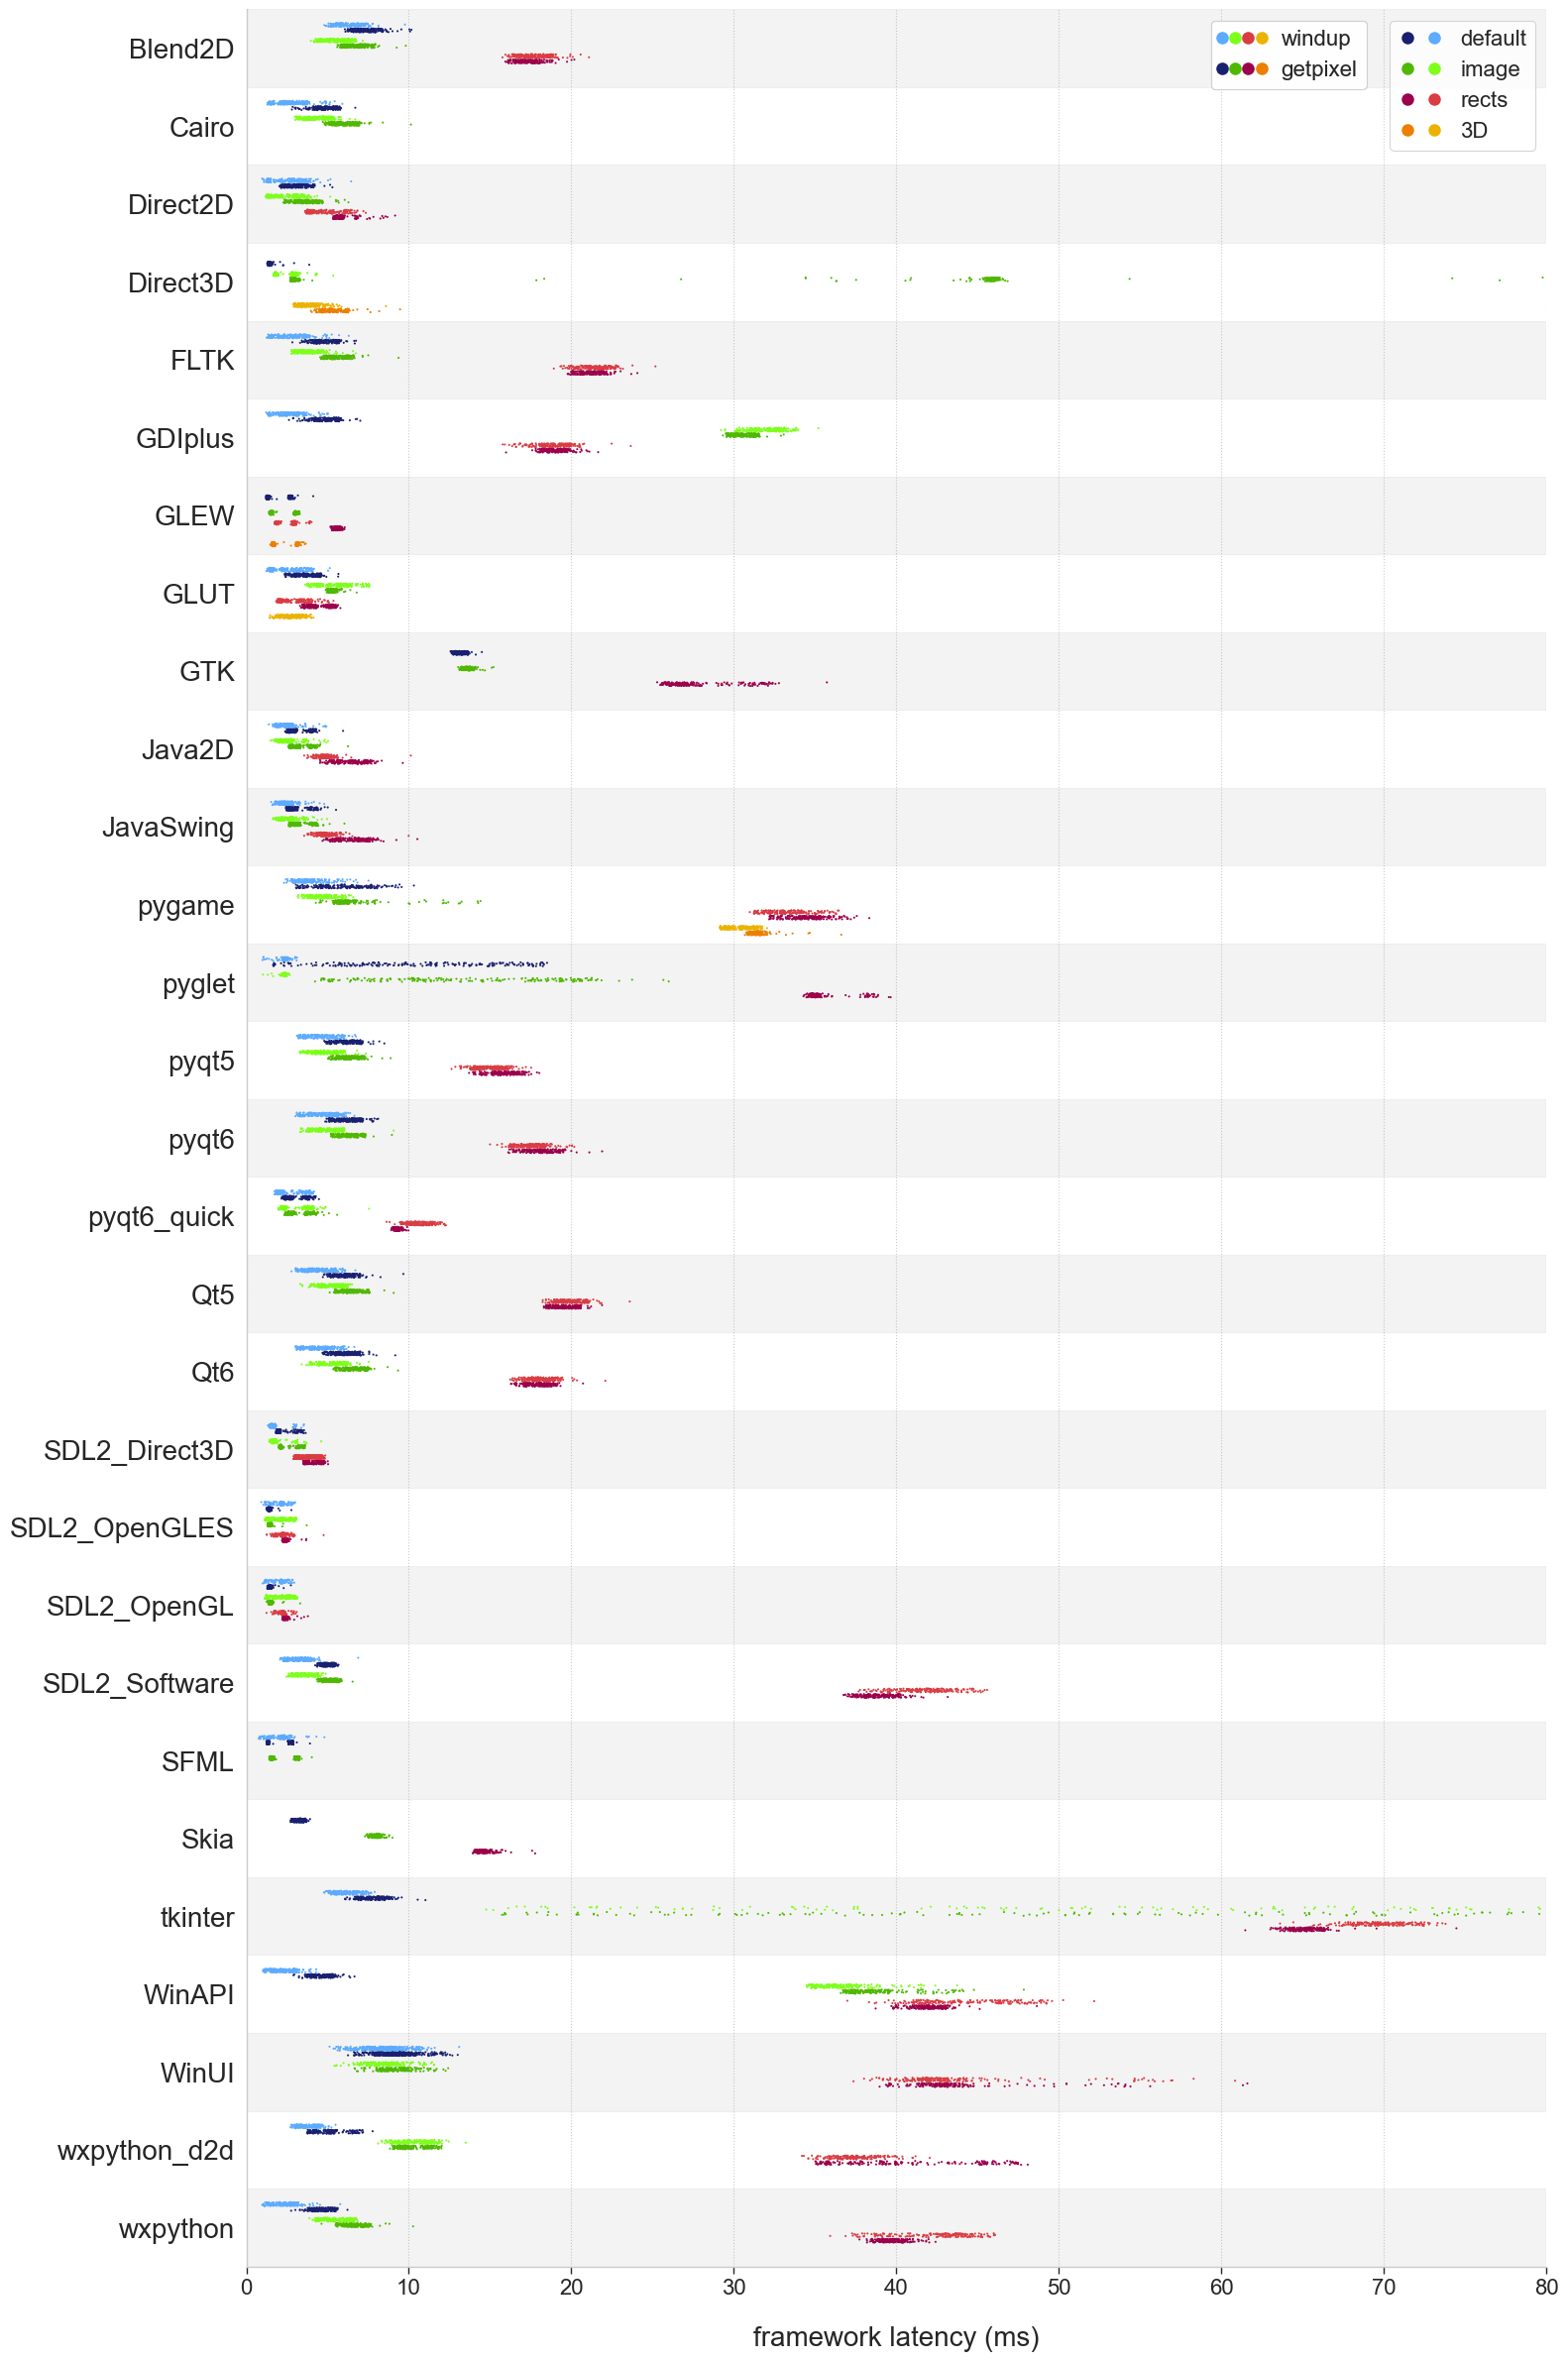

In [195]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(16, 24), "xtick.bottom": True, "grid.linestyle": ":"})

offset = lambda p: transforms.ScaledTranslation(0, p/72., plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

sns.stripplot(data=data[(data['program'] == 'windup') & (data['fw'] != -0.001) & (data['diff'] < 10)], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_DARK, size=1.5, transform=offset(0.05)+trans)
plot = sns.stripplot(data=data[(data['program'] == 'getpixel') & (data['fw'] != -0.001) & (data['diff'] < 10)], y='framework', x='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_LIGHT, size=1.5)

# stripped background
for i in range(len(data['framework'].unique())):
    if i % 2 == 0:
        plot.axhspan(i - 0.5, i + 0.5, color=COLOR_NONE, alpha=0.1)
plot.set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# increase label size
plot.set_xlabel('framework latency (ms)', fontsize=20)
plot.xaxis.labelpad = 20
plot.set_ylabel('')

plot.set_xlim(left=0, right=80)
plot.tick_params(axis='y', labelsize=20)
plot.tick_params(axis='x', labelsize=16)
plt.legend(title='', fontsize=20, loc='upper right')

handles, labels = plot.get_legend_handles_labels()
print(handles)
print(labels)

handles_getpixel = (handles[0], handles[1], handles[2], handles[3])
handles_windup = (handles[4], handles[5], handles[6], handles[7])

handles_default = (handles[0], handles[4])
handles_image = (handles[1], handles[5])
handles_rects = (handles[2], handles[6])
handles_3d = (handles[3], handles[7])

condition_legend = plot.legend([handles_default, handles_image, handles_rects, handles_3d], ['default', 'image', 'rects', '3D'], markerscale=6., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)
program_legend = plot.legend([handles_windup, handles_getpixel], ['windup', 'getpixel'], markerscale=6., loc='upper right', handler_map={tuple: HandlerTuple(ndivide=None)}, bbox_to_anchor=(0.87, 1), fontsize=16)
plt.gca().add_artist(condition_legend)
plt.gca().add_artist(program_legend)

plt.gca().invert_yaxis()
sns.despine(bottom = False, left = False)
plt.tight_layout()
plt.savefig("measurement_results.pdf", format='pdf')

In [197]:
cairo_median_getpixel = data[(data['program'] == 'getpixel') & (data['fw'] != -0.001) & (data['framework'] == 'Cairo') & (data['complexity'] == 'rects') & (data['diff'] < 10)]['fw'].median()
cairo_median_windup = data[(data['program'] == 'windup') & (data['fw'] != -0.001) & (data['framework'] == 'Cairo') & (data['complexity'] == 'rects') & (data['diff'] < 10)]['fw'].median()

print(cairo_median_getpixel)
print(cairo_median_windup)

227.16250000000002
235.063


In [198]:
pyglet_median_getpixel = data[(data['program'] == 'getpixel') & (data['fw'] != -0.001) & (data['framework'] == 'pyglet') & (data['complexity'] == '3D') & (data['diff'] < 10)]['fw'].median()
pyglet_median_windup = data[(data['program'] == 'windup') & (data['fw'] != -0.001) & (data['framework'] == 'pyglet') & (data['complexity'] == '3D') & (data['diff'] < 10)]['fw'].median()

print(pyglet_median_getpixel)
print(pyglet_median_windup)

nan
97.727


In [98]:
# data_temp = data_cleaned[data_cleaned['complexity'] != '3D']

# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(20, 18), "xtick.bottom": True, "grid.linestyle": ":"})

# offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
# trans = plt.gca().transData

# plot = sns.stripplot(data=data_cleaned[data_cleaned['program'] == 'getpixel'], x='framework', y='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_LIGHT, size=2)
# sns.stripplot(data=data_cleaned[data_cleaned['program'] == 'windup'], x='framework', y='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_DARK, transform=offset(0.07)+trans, size=2)

# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.axes.set_ylim(bottom=0)

# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         plot.axvspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# plot.set_xlim(-0.5, len(data['framework'].unique()) - 0.5)

# # increase label size
# plot.set_ylabel('framework latency (ms)', fontsize=28)
# plot.yaxis.labelpad = 20
# plot.set_xlabel('')

# # todo: legend
# # handles, labels = plot.get_legend_handles_labels()
# # print(handles)
# # print(labels)

# # handles_getpixel = (handles[0], handles[1], handles[2], handles[3])
# # handles_windup = (handles[4], handles[5], handles[6], handles[7])

# # handles_default = (handles[0], handles[4])
# # handles_image = (handles[1], handles[5])
# # handles_rects = (handles[2], handles[6])
# # handles_3d = (handles[3], handles[7])

# # condition_legend = plot.legend([handles_default, handles_image, handles_rects, handles_3d], ['default', 'image', 'rects', '3D'], markerscale=5., loc='upper left', handler_map={tuple: HandlerTuple(ndivide=None)})
# # program_legend = plot.legend([handles_windup, handles_getpixel], ['windup', 'getpixel'], markerscale=5., handler_map={tuple: HandlerTuple(ndivide=None)})
# # plt.gca().add_artist(condition_legend)
# # plt.gca().add_artist(program_legend)

# plot.set_title('framework latency')
# sns.despine(bottom = False, left = False)

In [99]:
# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(20, 7), "xtick.bottom": True, "grid.linestyle": ":"})
# plt.rcParams["figure.autolayout"] = True

# offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
# trans = plt.gca().transData

# plot = sns.stripplot(data=data[data['program'] == 'getpixel'], x='framework', y='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette='blend:cyan,darkblue', size=1, jitter=True)
# sns.stripplot(data=data[data['program'] == 'windup'], x='framework', y='fw', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette='blend:orangered,darkred', transform=offset(0.05)+trans, size=1)

# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.axes.set_ylim(0, 50)



# # yticks = [0, 10, 20, 30, 40, 50, 100, 500, 1000]
# # plot.set_yticks(range(len(yticks)))
# # plot.set_yticklabels(yticks)

# from matplotlib.ticker import FixedLocator, FixedFormatter
# # Define the custom y-tick values and labels
# small_tick_values = np.arange(0, 50, 10)  # Small steps from 0 to 5
# large_tick_values = np.arange(50, 350, 100)  # Larger steps from 10 to 30

# # Combine the tick values
# tick_values = np.concatenate([small_tick_values, large_tick_values])

# # Create evenly spaced positions for these ticks
# # tick_positions = np.linspace(0, 300, len(tick_values))
# num_ticks = len(tick_values)
# tick_positions = np.linspace(0, 1, num_ticks) * (max(tick_values) - min(tick_values)) + min(tick_values)

# # Set the custom y-ticks using FixedLocator and FixedFormatter
# plot.get_yaxis().set_major_locator(FixedLocator(tick_positions))
# plot.get_yaxis().set_major_formatter(FixedFormatter(tick_values))



# handles, labels = plot.get_legend_handles_labels()
# print(handles)
# print(labels)

# handles_getpixel = (handles[0], handles[1], handles[2], handles[3])
# handles_windup = (handles[4], handles[5], handles[6], handles[7])

# handles_default = (handles[0], handles[4])
# handles_image = (handles[1], handles[5])
# handles_rects = (handles[2], handles[6])
# handles_3d = (handles[3], handles[7])

# condition_legend = plot.legend([handles_default, handles_image, handles_rects, handles_3d], ['default', 'image', 'rects', '3D'], markerscale=5., loc='upper left', handler_map={tuple: HandlerTuple(ndivide=None)})
# program_legend = plot.legend([handles_windup, handles_getpixel], ['windup', 'getpixel'], markerscale=5., handler_map={tuple: HandlerTuple(ndivide=None)})
# plt.gca().add_artist(condition_legend)
# plt.gca().add_artist(program_legend)

# plot.set_title('framework latency')
# sns.despine(bottom = False, left = False)

In [100]:
# # fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))

# plt.figure(figsize=(10, 28))

# plot = sns.stripplot(data=data_cleaned[data_cleaned['complexity'] == 'default'], x='fw', y='framework', hue='program', size=1.5, dodge=True, hue_order=['getpixel', 'windup'], palette=[COLOR_BLUE, COLOR_DARKBLUE], alpha=0.3, legend=False, zorder=1)
# plot = sns.pointplot(data=data_cleaned[data_cleaned['complexity'] == 'default'], x='fw', y='framework', hue='program', hue_order=['getpixel', 'windup'], palette=[COLOR_BLUE, COLOR_DARKBLUE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# plot.set_xlabel('framework latency (ms)\nfor condition DEFAULT', fontsize=28)
# plot.xaxis.labelpad = 20
# plot.set_ylabel('')

# plot.set_xlim(left=0)

# plot.tick_params(axis='both', labelsize=20)
# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         plot.axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# plot.set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# plt.legend(title='', fontsize=20, loc='upper right')

# # plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

In [101]:
# # fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))

# plt.figure(figsize=(10, 28))

# plot = sns.stripplot(data=data_cleaned[data_cleaned['complexity'] == 'image'], x='fw', y='framework', hue='program', size=1.5, dodge=True, hue_order=['getpixel', 'windup'], palette=[COLOR_GREEN, COLOR_DARKGREEN], alpha=0.3, legend=False, zorder=1)
# plot = sns.pointplot(data=data_cleaned[data_cleaned['complexity'] == 'image'], x='fw', y='framework', hue='program', hue_order=['getpixel', 'windup'], palette=[COLOR_GREEN, COLOR_DARKGREEN], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# plot.set_xlabel('framework latency (ms)\nfor condition IMAGE', fontsize=28)
# plot.xaxis.labelpad = 20
# plot.set_ylabel('')

# plot.set_xlim(left=0)

# plot.tick_params(axis='both', labelsize=20)
# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         plot.axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# plot.set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# plt.legend(title='', fontsize=20, loc='upper right')

# # plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

In [102]:
# # fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))

# plt.figure(figsize=(10, 28))

# plot = sns.stripplot(data=data_cleaned[data_cleaned['complexity'] == 'rects'], x='fw', y='framework', hue='program', size=1.5, dodge=True, hue_order=['getpixel', 'windup'], palette=[COLOR_GLUTROT, COLOR_HEIDENELKE], alpha=0.3, legend=False, zorder=1)
# plot = sns.pointplot(data=data_cleaned[data_cleaned['complexity'] == 'rects'], x='fw', y='framework', hue='program', hue_order=['getpixel', 'windup'], palette=[COLOR_GLUTROT, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# plot.set_xlabel('framework latency (ms)\nfor condition RECTS', fontsize=28)
# plot.xaxis.labelpad = 20
# plot.set_ylabel('')

# plot.set_xlim(left=0, right=80)

# plot.tick_params(axis='both', labelsize=20)
# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         plot.axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# plot.set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# plt.legend(title='', fontsize=20, loc='upper right')

# # plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

In [103]:
# # fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))

# plt.figure(figsize=(10, 6))

# plot = sns.stripplot(data=data_cleaned[data_cleaned['complexity'] == '3D'], x='fw', y='framework', hue='program', size=1.5, dodge=True, hue_order=['getpixel', 'windup'], palette=[COLOR_OCKER, COLOR_OCKER_ANDI], alpha=0.4, legend=False, zorder=1)
# plot = sns.pointplot(data=data_cleaned[data_cleaned['complexity'] == '3D'], x='fw', y='framework', hue='program', hue_order=['getpixel', 'windup'], palette=[COLOR_OCKER, COLOR_OCKER_ANDI], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# plot.set_xlabel('framework latency (ms)\nfor condition 3D', fontsize=28)
# plot.xaxis.labelpad = 20
# plot.set_ylabel('')

# plot.set_xlim(left=0, right=150)

# plot.tick_params(axis='both', labelsize=20)
# # stripped background
# for i in range(len(data_cleaned[data_cleaned['complexity'] == '3D']['framework'].unique())):
#     if i % 2 == 0:
#         plot.axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# plot.set_ylim(-0.5, len(data_cleaned[data_cleaned['complexity'] == '3D']['framework'].unique()) - 0.5)

# plt.legend(title='', fontsize=20, loc='upper right')

# # plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

In [104]:
# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(15, 5), "xtick.bottom": True, "grid.linestyle": ":"})

# data_temp = data_cleaned[data_cleaned['complexity'] == 'default']
# plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel'], dodge=True, palette=f'blend:{COLOR_BLUE},{COLOR_DARKBLUE}', size=2)

# plot.set_ylabel('framework latency (ms)', fontsize=14)
# plot.yaxis.labelpad = 20
# plot.set_xlabel('')

# plot.set_ylim(bottom=0)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# # #plot.set_title('framework latency for complexity DEFAULT')
# sns.despine(bottom = False, left = False)

In [105]:
# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(15, 5), "xtick.bottom": True, "grid.linestyle": ":"})

# data_temp = data[data['complexity'] == 'image']
# plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel'], dodge=True, palette='blend:lawngreen,forestgreen', size=2)

# plot.set_ylim(0, 20)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.set_title('framework latency for complexity IMAGE')
# sns.despine(bottom = False, left = False)

In [106]:
# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(15, 5), "xtick.bottom": True, "grid.linestyle": ":"})

# data_temp = data[data['complexity'] == 'rects']
# plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel'], dodge=True, palette='blend:orangered,darkred', size=2)



# plot.set_ylim(0, 300)
# # plot.set_yticks([0, 10, 20, 30, 50, 100, 200, 300])
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.set_title('framework latency for complexity RECTS')
# sns.despine(bottom = False, left = False)

In [107]:
# sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(5, 5), "xtick.bottom": True, "grid.linestyle": ":"})

# data_temp = data[data['complexity'] == '3D']
# plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel'], dodge=True, palette='blend:lawngreen,forestgreen', size=2)

# plot.set_ylim(0, 150)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.set_title('framework latency for complexity 3D')
# sns.despine(bottom = False, left = False)

In [108]:
# data_temp = pd.concat([data, data_original[data_original['program'] == 'none']])
# plot = sns.stripplot(data=data_temp, x='framework', y='ete_upper', hue='program', size=2, dodge=True, palette=[COLOR_BLUE, COLOR_GLUTROT, COLOR_NONE])
# plot.axes.set_ylim(0, 300)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# data_temp

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_22708\2771929070.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Blend2D'),
 Text(1, 0, 'Cairo'),
 Text(2, 0, 'Direct2D'),
 Text(3, 0, 'Direct3D'),
 Text(4, 0, 'FLTK'),
 Text(5, 0, 'GDIplus'),
 Text(6, 0, 'GLEW'),
 Text(7, 0, 'GLUT'),
 Text(8, 0, 'GTK'),
 Text(9, 0, 'Java2D'),
 Text(10, 0, 'JavaSwing'),
 Text(11, 0, 'pygame'),
 Text(12, 0, 'pyglet'),
 Text(13, 0, 'pyqt5'),
 Text(14, 0, 'pyqt6'),
 Text(15, 0, 'pyqt6_quick'),
 Text(16, 0, 'Qt5'),
 Text(17, 0, 'Qt6'),
 Text(18, 0, 'SDL2_Direct3D'),
 Text(19, 0, 'SDL2_OpenGLES'),
 Text(20, 0, 'SDL2_OpenGL'),
 Text(21, 0, 'SDL2_Software'),
 Text(22, 0, 'SFML'),
 Text(23, 0, 'Skia'),
 Text(24, 0, 'tkinter'),
 Text(25, 0, 'WinAPI'),
 Text(26, 0, 'WinUI'),
 Text(27, 0, 'wxpython_d2d'),
 Text(28, 0, 'wxpython')]

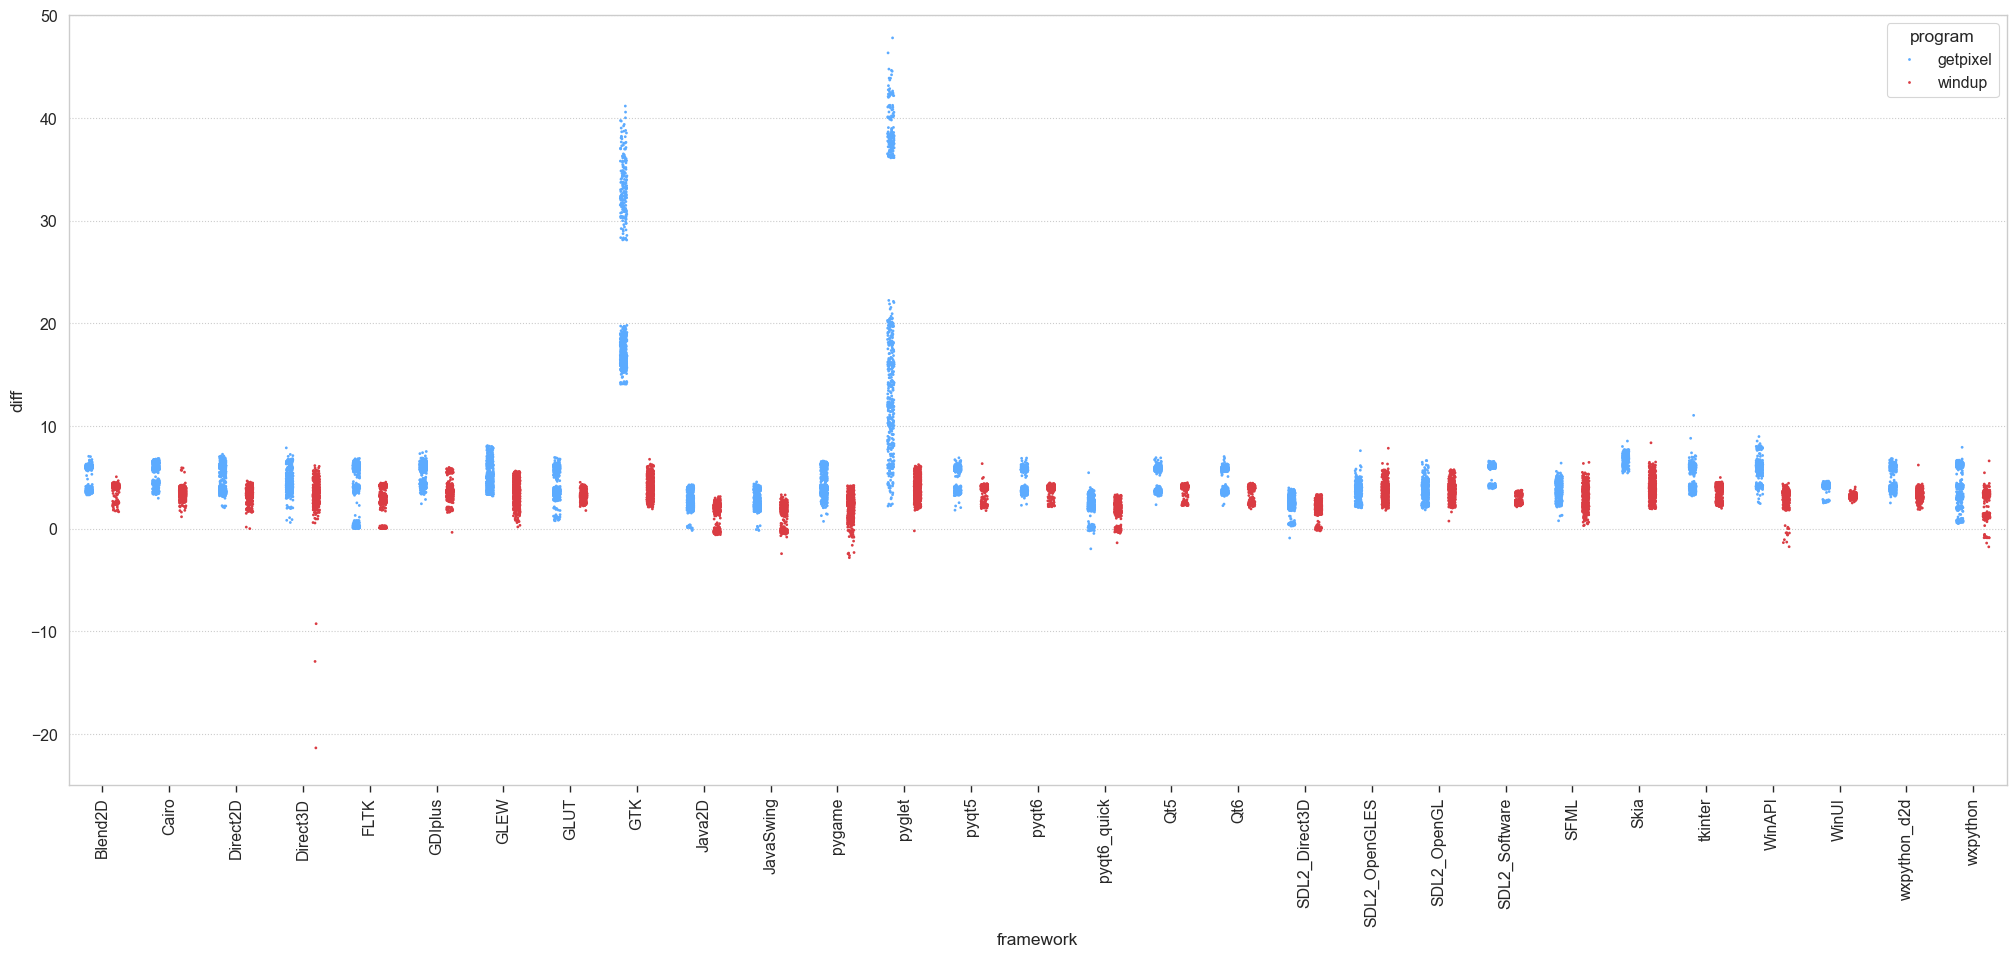

In [161]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(25, 10), "xtick.bottom": True, "grid.linestyle": ":"})

plot = sns.stripplot(data=data[data['program'] != 'none'], x='framework', y='diff', hue='program', size=2, dodge=True, palette=[COLOR_BLUE, COLOR_GLUTROT])
# plot = sns.boxplot(data=data[data['program'] != 'none'], x='framework', y='diff', hue='program', hue_order=['getpixel', 'bitblt', 'getdbits', 'windup'], dodge=True, palette=['red', 'orange', 'darkred', 'blue'])
plot.axes.set_ylim(-25, 50)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [110]:
# data_temp = pd.concat([data, data_original[data_original['program'] == 'none']])

# fig, axs = plt.subplots(1, 2, layout='constrained', sharex=False, sharey=True, figsize=(20, 28))
# axs[0].tick_params(axis='both', labelsize=20)
# axs[1].tick_params(axis='both', labelsize=20)

# # stripped background
# for i in range(len(data['framework'].unique())):
#     if i % 2 == 0:
#         axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
#         axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
# axs[0].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
# axs[1].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

# plot = sns.swarmplot(ax=axs[0], data=data_temp, x='ete_upper', y='framework', hue='program', size=1.5, dodge=0.8, hue_order=['getpixel', 'windup', 'none'], palette=[COLOR_BLUE, COLOR_GLUTROT, 'lightgrey'], legend=False, zorder=1)
# plot = sns.swarmplot(ax=axs[1], data=data, x='diff', y='framework', hue='program', size=1.5, dodge=0.6, hue_order=['getpixel', 'windup'], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
# plot = sns.pointplot(ax=axs[0], data=data_temp, x='ete_upper', y='framework', hue='program', hue_order=['getpixel', 'windup', 'none'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE, COLOR_NONE], legend=False, dodge=0.55, join=False, errorbar='sd', markersize=6, zorder=2)
# plot = sns.pointplot(ax=axs[1], data=data, x='diff', y='framework', hue='program', hue_order=['getpixel', 'windup'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# # increase label size
# axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
# axs[1].set_xlabel('differences (ms)', fontsize=28)
# axs[0].xaxis.labelpad = 20
# axs[1].xaxis.labelpad = 20
# axs[0].set_ylabel('')

# axs[0].set_xlim(0, 270)
# axs[1].set_xlim(-20, 50)

# plt.legend(title='', fontsize=20, loc='upper right')

# plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

# for approach description (validation, best case)

In [111]:
data_temp = data[data['framework'] == 'SDL2_Direct3D']
data_temp = data_temp[data_temp['complexity'] != 'image']
data_temp = data_temp[data_temp['program'] == 'windup']
data_temp

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,2312,SDL2_Direct3D,default,SDL2_Direct3D_default,fullscreen,3.0,windup,5.440,5.862,2.972,2.468
1,1,1,2312,SDL2_Direct3D,default,SDL2_Direct3D_default,fullscreen,3.0,windup,4.397,4.648,1.930,2.467
2,2,2,2312,SDL2_Direct3D,default,SDL2_Direct3D_default,fullscreen,3.0,windup,3.882,4.132,2.014,1.868
3,3,3,2312,SDL2_Direct3D,default,SDL2_Direct3D_default,fullscreen,3.0,windup,4.229,4.479,2.061,2.168
4,4,4,2312,SDL2_Direct3D,default,SDL2_Direct3D_default,fullscreen,3.0,windup,5.602,5.681,3.144,2.458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,3844,SDL2_Direct3D,rects,SDL2_Direct3D_rects,fullscreen,3.0,windup,5.943,2.061,3.980,1.963
196,196,196,3844,SDL2_Direct3D,rects,SDL2_Direct3D_rects,fullscreen,3.0,windup,5.594,2.233,3.740,1.854
197,197,197,3844,SDL2_Direct3D,rects,SDL2_Direct3D_rects,fullscreen,3.0,windup,6.112,1.030,4.125,1.987
198,198,198,3844,SDL2_Direct3D,rects,SDL2_Direct3D_rects,fullscreen,3.0,windup,5.599,2.237,3.781,1.818


In [112]:
data_temp = data_temp.reset_index()
data_temp

,index,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,0,2312,SDL2_Direct3D,default,SDL2_Direct3D_default,fullscreen,3.0,windup,5.440,5.862,2.972,2.468
1,1,1,1,2312,SDL2_Direct3D,default,SDL2_Direct3D_default,fullscreen,3.0,windup,4.397,4.648,1.930,2.467
2,2,2,2,2312,SDL2_Direct3D,default,SDL2_Direct3D_default,fullscreen,3.0,windup,3.882,4.132,2.014,1.868
3,3,3,3,2312,SDL2_Direct3D,default,SDL2_Direct3D_default,fullscreen,3.0,windup,4.229,4.479,2.061,2.168
4,4,4,4,2312,SDL2_Direct3D,default,SDL2_Direct3D_default,fullscreen,3.0,windup,5.602,5.681,3.144,2.458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,195,195,195,3844,SDL2_Direct3D,rects,SDL2_Direct3D_rects,fullscreen,3.0,windup,5.943,2.061,3.980,1.963
396,196,196,196,3844,SDL2_Direct3D,rects,SDL2_Direct3D_rects,fullscreen,3.0,windup,5.594,2.233,3.740,1.854
397,197,197,197,3844,SDL2_Direct3D,rects,SDL2_Direct3D_rects,fullscreen,3.0,windup,6.112,1.030,4.125,1.987
398,198,198,198,3844,SDL2_Direct3D,rects,SDL2_Direct3D_rects,fullscreen,3.0,windup,5.599,2.237,3.781,1.818


In [113]:
# data_best_case = pd.DataFrame(columns=['fast', 'diff', 'slow'])
# # np.concatenate([slow, [np.nan] * (max_len - len(slow))])
# data_best_case['slow'] = np.concatenate([data_temp[data_temp['complexity'] == 'rects']['ete_upper'], [np.nan] * 200])
# data_best_case['fast'] = np.concatenate([data_temp[data_temp['complexity'] == 'default']['ete_upper'], [np.nan] * 200])
# data_best_case['diff'] = data_temp['diff']
# # data_best_case['diff_fast'] = data_temp[data_temp['complexity'] == 'default']['diff']
# # data_best_case['diff_slow'] = data_temp[data_temp['complexity'] == 'rects']['diff']

# # data_temp[data_temp['complexity'] == 'rects']['ete_upper']
# data_best_case.reset_index()



# print(len(data_temp[data_temp['complexity'] == 'rects']['ete_upper']))
# print(len(data_temp[data_temp['complexity'] == 'default']['ete_upper']))
# print(len(data_temp['diff']))
# data_best_case

# data_temp
# data_temp[data_temp['complexity'] == 'rects']['ete_upper']

data_best_case = pd.DataFrame()
data_best_case['ete'] = data_temp['ete_upper']
# data_best_case['diff'] = data_temp['diff']
# data_best_case['complexity'] = data_temp['complexity']
data_best_case['diff'] = data_temp['diff']
data_best_case['diff_fast'] = data_temp[data_temp['complexity'] == 'default']['diff']
data_best_case['diff_slow'] = data_temp[data_temp['complexity'] == 'rects']['diff']
data_best_case['condition'] = np.where(pd.isna(data_best_case['diff_slow']), 0, 1)

data_long = pd.melt(data_best_case, id_vars='condition', var_name='variable', value_name='value')

data_best_case
data_long

,condition,variable,value
0,0,ete,5.440
1,0,ete,4.397
2,0,ete,3.882
3,0,ete,4.229
4,0,ete,5.602
...,...,...,...
1595,1,diff_slow,1.963
1596,1,diff_slow,1.854
1597,1,diff_slow,1.987
1598,1,diff_slow,1.818


Text(0.5, 0, 'framework')

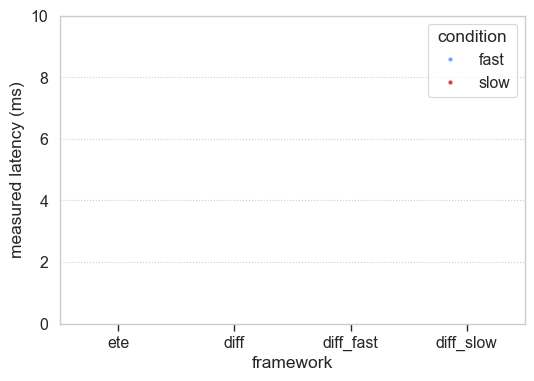

In [114]:
data_best_case = data_best_case[data_best_case['diff'] > 0.5]
# data_temp = data_temp[data_temp['diff'] < 2.8]

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(6, 4), "xtick.bottom": True, "grid.linestyle": ":"})

plot = sns.stripplot(data=data_long, x='variable', y='value', hue='condition', hue_order=['fast', 'slow'], palette=[COLOR_BLUE, COLOR_GLUTROT], size=3)
# plot = sns.boxplot(data=data_best_case, x='complexity', y='ete', fill=False, color=COLOR_NONE)
# plot = sns.boxplot(data=data_best_case, x='complexity', y='diff', fill=False, color='black')
# plot = sns.stripplot(data=data_best_case, order=['diff_slow', 'diff_fast'], palette=[COLOR_BLUE, COLOR_GLUTROT], size=3)
# plot = sns.boxplot(data=data_temp, x='program', y='ete_upper', order=['windup', 'none'], palette=['grey', 'darkred'], fill=False)
plot.set_ylim(bottom=0, top=10)
plot.set_ylabel('measured latency (ms)')
plot.set_xlabel('framework')
